### Import packages

In [1]:
options(stringsAsFactors = FALSE)
library(GenomicRanges)
library(scABC)
library(Rsamtools)
library(data.table)
library(dplyr)
library(tidyverse)
library(Matrix)

library(gplots) 
library(RColorBrewer)
library(devtools)
source_url("https://raw.githubusercontent.com/obigriffith/biostar-tutorials/master/Heatmaps/heatmap.3.R")

Loading required package: stats4
Loading required package: BiocGenerics
Loading required package: parallel

Attaching package: ‘BiocGenerics’

The following objects are masked from ‘package:parallel’:

    clusterApply, clusterApplyLB, clusterCall, clusterEvalQ,
    clusterExport, clusterMap, parApply, parCapply, parLapply,
    parLapplyLB, parRapply, parSapply, parSapplyLB

The following objects are masked from ‘package:stats’:

    IQR, mad, sd, var, xtabs

The following objects are masked from ‘package:base’:

    anyDuplicated, append, as.data.frame, basename, cbind, colMeans,
    colnames, colSums, dirname, do.call, duplicated, eval, evalq,
    Filter, Find, get, grep, grepl, intersect, is.unsorted, lapply,
    lengths, Map, mapply, match, mget, order, paste, pmax, pmax.int,
    pmin, pmin.int, Position, rank, rbind, Reduce, rowMeans, rownames,
    rowSums, sapply, setdiff, sort, table, tapply, union, unique,
    unsplit, which, which.max, which.min

Loading required package: S4Ve

### Load Data

In [2]:
load(file = 'scABC_cusanovich2018subset.RData')

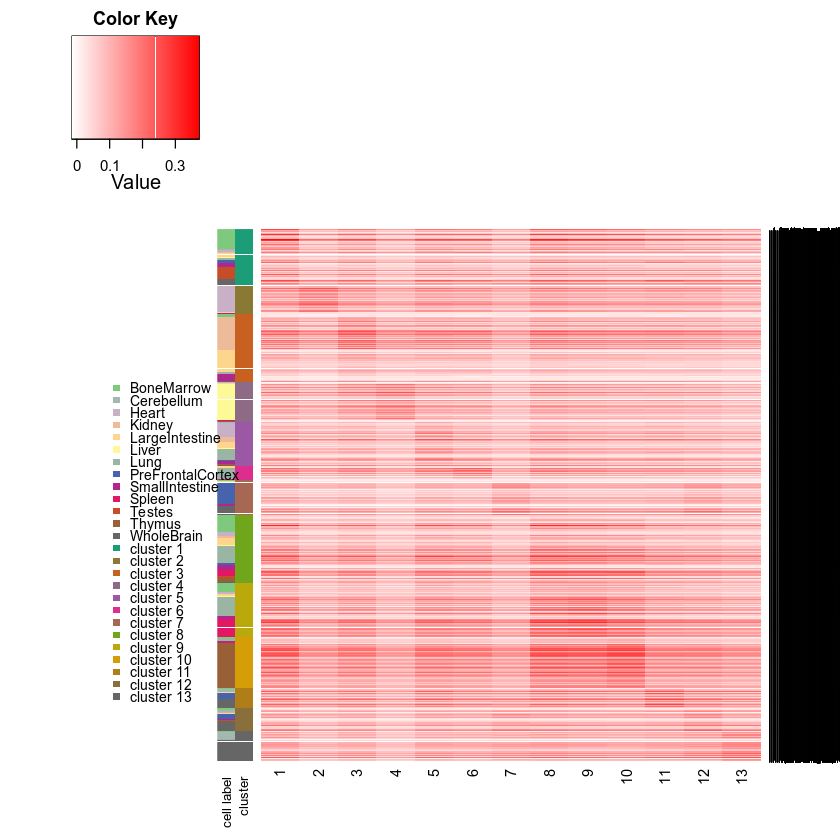

In [3]:
heatmap.3(InSilicoCell2LandmarkCorrelation_sorted, dendrogram='none', Rowv=FALSE, Colv=FALSE,
          trace='none', col = scalered, margin = c(5, 5), density.info = "none", 
          RowSideColors = rowcols, RowSideColorsSize=2, symm=F,symkey=F,
          symbreaks=F, scale="none",)
legend("bottomleft", legend = c(unique(cell.labels), paste0("cluster ", 1:length(unique(metadata$label)))), 
       col = c(rcols1, rcols2), border=FALSE, bty="n", y.intersp = 0.7, cex=0.7, pch = 15)

In [4]:
tail(InSilicoLandMarkAssignments_sorted)


../../input/sc-bams_nodup//WholeBrainA_62816.TCTCGCGCGTAGGCTGCACGCCTCTTATGTACTGAC.header.bam 
                                                                                          13 
../../input/sc-bams_nodup//WholeBrainA_62816.TCTCGCGCTCAATCTCCTGTCTGCAATCAGGCGAAG.header.bam 
                                                                                          13 
../../input/sc-bams_nodup//WholeBrainA_62816.TCTCGCGCTGGACGACTACGCCTCTTATCCTATCCT.header.bam 
                                                                                          13 
../../input/sc-bams_nodup//WholeBrainA_62816.TCTCGCGCTTCGAATATTTGCCAGTTGCGGCTCTGA.header.bam 
                                                                                          13 
../../input/sc-bams_nodup//WholeBrainA_62816.TCTCGCGCTTGCTTAGATGAGACCTACCAGGCGAAG.header.bam 
                                                                                          13 
../../input/sc-bams_nodup//WholeBrainA_62816.TCTCGCGCTTGCTTAGATGTTGGATCTTGTACTGAC.header.bam 
                                                                                          13

In [5]:
result = data.frame('scABC'=InSilicoLandMarkAssignments_sorted)
rownames(result) = sapply(strsplit(basename(rownames(result)),'\\.'),'[', 2)

df_pre = result
df_pre$ord = 1:nrow(df_pre)
df_pre = df_pre[as.character(rownames(metadata)),]
df_out = data.frame('scABC'=df_pre[,'scABC'])
rownames(df_out) = rownames(df_pre)

write.table(result,file="clusteringSolution.tsv", quote=FALSE, sep='\t', col.names = NA)